# Veri Bilimi İçin İstatistik

### 1. Betimsel İstatistik

#### ● Varyans => Ortalama etrafındaki dağılımın ölçüsü
#### ● Kovaryans => İki değişken arasındaki değişkenlik ölçüsü
#### ● Korelasyon => İki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, ilişkinin şiddetini ve yönünü ifade eden istatistiksel bir tekniktir.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

df=pd.read_csv("dataset/youtubeGB.csv") 
youtube=df.copy()

In [2]:
!pip install researchpy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import researchpy as rp

# Sürekli (sayısal) değişkenler için kullanılır.
rp.summary_cont(youtube[["views","likes","dislikes"]])

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,views,38916.0,5.911944e+06,1.900121e+07,96320.1520,5.723154e+06,6.100734e+06
1,likes,38916.0,1.345196e+05,3.499893e+05,1774.1514,1.310422e+05,1.379969e+05
2,dislikes,38916.0,7.612560e+03,5.095683e+04,258.3083,7.106269e+03,8.118851e+03


### Not:
##### N: eleman sayısı
##### Mean: ortalama
#####  SD - Standart Deviation:(Standart Sapma)
##### SE - Standart Error: (Standart Hata)
##### 95% Conf. interval : (default değeri 95%) %95 güven aralığı, popülasyonun gerçek ortalamasını içerdiğinden %95 emin olabileceğiniz bir değerler aralığıdır. Doğal örnekleme değişkenliği nedeniyle, örnek ortalaması (CI'nin merkezi) örnekten örneğe değişecektir.
##### Güven Aralığı: Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.

In [5]:
# Kategorik değişkenler için kullanılır.
rp.summary_cat(youtube[["trending_date","tags"]].head(15))

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\researchpy\summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,trending_date,17.14.11,15,100.00
1,tags,"christmas|""john lewis christmas""|""john lewis""|...",1,6.67
2,,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1,6.67
3,,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",1,6.67
4,,"Salford City FC|""Salford City""|""Salford""|""Clas...",1,6.67
5,,[none],1,6.67
6,,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1,6.67
7,,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",1,6.67
8,,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1,6.67
9,,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",1,6.67


In [7]:
# likes ve comment_count alanlarının cov() fonksiyonu ile kovaryansı hesaplanır.
youtube[["likes","comment_count"]].cov()

,likes,comment_count
likes,1.224925e+11,1.319979e+10
comment_count,1.319979e+10,2.567185e+09


### 2. Geometrik Dağılım

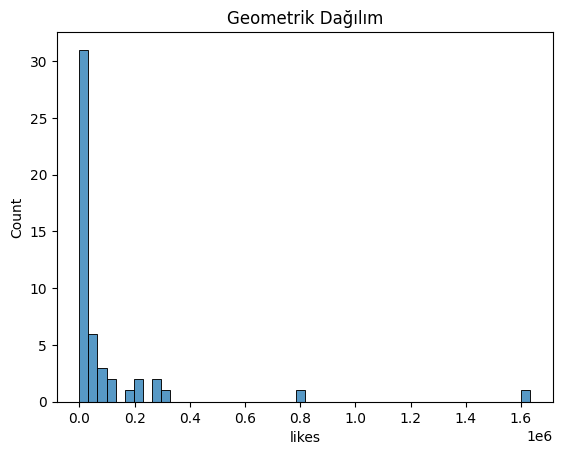

In [10]:
import seaborn as sns

# likes kolonunun geometrik dağılımını gösterecektir. (ilk 50 kayıt için)
sns.histplot(youtube["likes"].head(50),bins=50).set(title='Geometrik Dağılım');

### 3. Normallik Varsayımı

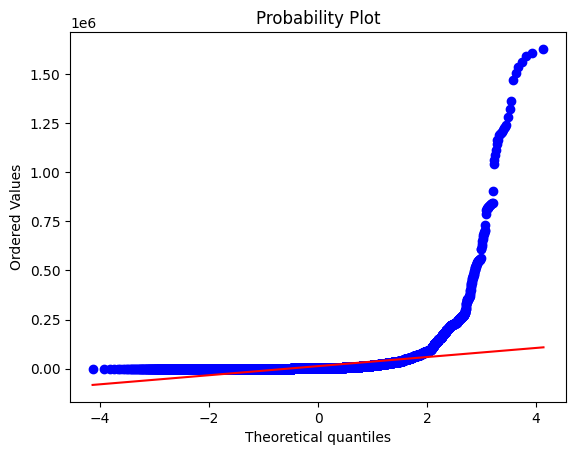

In [9]:
import scipy.stats as stats
import pylab

stats.probplot(youtube["comment_count"], dist="norm", plot=pylab)
pylab.show()

Yukarıdaki grafiğe baktığımızda videolara yapılan yorum sayılarının normal dağılım varsayımının gözlemlenmediği görülmektedir. Çünkü eldeki mavi noktalar kırmızı doğru üzerinde yoğunlaşmamıştır.

### 4. YouTube Veri Setimiz Üzerinde Korelasyon Analizi

Korelasyon analizi; Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.
Değişkenler birlikte artıyor veya azalıyorsa pozitif yönde, değişkenlerden biri artarken diğeri azalıyorsa ise negatif yönde bir ilişki vardır.

##### HO: p = 0 (Değişkenler arasında korelasyon yoktur.)
##### H1: p != 0 (Değişkenler arasında korelasyon vardır. Yani değişkenler arasında anlamlı bir ilişki vardır.)
##### Beklenti: p-value değerinin 0.05'den küçük olup H0'ı reddetmesi beklenir.

In [11]:
from scipy.stats import shapiro

# Veri setimizdeki kayıtlar arasında izlenme sayısı ile beğeni sayısı arasında korelasyon var mı diye bakalım.
test_istatistigi, pvalue = shapiro(youtube["likes"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(youtube["views"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.3799, p-değeri = 0.0000
Test İstatistiği = 0.2932, p-değeri = 0.0000


C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Yukarıdaki çıktıya bakarsak; p-value değeri 0.05'den küçük olduğu için H0'ı reddetmiş oluyoruz.

In [12]:
# Varsayım sağlanmadığı için spearman korelasyon katsayısını kullanmalıyız.
youtube["likes"].corr(df["views"], method = "spearman")

0.897894466702777

#### Not: 
     + değer olduğundan pozitif yönlü,
     0.5'den büyük olduğu için yüksek bir korelasyon olduğunu çıkartabiliriz.

In [13]:
from scipy.stats import stats

stats.spearmanr(youtube["likes"],youtube["views"])

C:\Users\pc\AppData\Local\Temp\ipykernel_13160\2371391663.py:2: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.spearmanr(youtube["likes"],youtube["views"])


SpearmanrResult(correlation=0.897894466702777, pvalue=0.0)

In [14]:
test_istatistigi, pvalue = stats.spearmanr(youtube["likes"],youtube["views"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.8979, p-değeri = 0.0000


C:\Users\pc\AppData\Local\Temp\ipykernel_13160\1884776656.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  test_istatistigi, pvalue = stats.spearmanr(youtube["likes"],youtube["views"])
